In [65]:
import numpy as np 
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to c:\Users\bhara\AppData\Lo
[nltk_data]     cal\Programs\Python\Python310\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
df_coursera = pd.read_csv("merged_dataset.csv")
df_coursera.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...


In [67]:
df_coursera.shape

(348764, 8)

In [68]:
df_coursera = df_coursera.drop_duplicates()
df_coursera.shape


(348761, 8)

In [69]:
df_coursera['Platform'] = 'Coursera'

In [70]:

df_coursera = df_coursera.drop(columns=['date_reviews', 'reviewers'], axis=1)

In [71]:
df_combined = pd.read_csv('final_combined_dataset1.csv', low_memory=False)

In [72]:
df_combined.head()

,course_id,course_name,ratings,reviews,Offered_by
0,financial-markets-global,Financial Markets,3.0,"I really liked this class, practice lab assign...",Coursera
1,financial-markets-global,Financial Markets,3.0,Prof Steve Joordens is an excellent teacher an...,Coursera
2,financial-markets-global,Financial Markets,4.0,"In the beginning, I found the instructor ...",Coursera
3,financial-markets-global,Financial Markets,4.0,It was an excelent and perfect course for...,Coursera
4,financial-markets-global,Financial Markets,4.0,Murtaza Haider's readings were enjoyable ...,Coursera


In [73]:
df_combined['course_id'] = df_combined['course_id'].astype(str)
df_combined['course_name'] = df_combined['course_name'].astype(str)
df_combined['ratings'] = df_combined['ratings'].astype(float)
df_combined['reviews'] = df_combined['reviews'].astype(str)
df_combined['Offered_by'] = df_combined['Offered_by'].astype(str)
df_combined['institution'] = 'Not Available'
df_combined['course_url'] = 'Not Available'
df_combined = df_combined.rename(columns={'course_name': 'name','Offered_by': 'Platform', 'ratings': 'rating'})

In [74]:
df_combined.head()

,course_id,name,rating,reviews,Platform,institution,course_url
0,financial-markets-global,Financial Markets,3.0,"I really liked this class, practice lab assign...",Coursera,Not Available,Not Available
1,financial-markets-global,Financial Markets,3.0,Prof Steve Joordens is an excellent teacher an...,Coursera,Not Available,Not Available
2,financial-markets-global,Financial Markets,4.0,"In the beginning, I found the instructor ...",Coursera,Not Available,Not Available
3,financial-markets-global,Financial Markets,4.0,It was an excelent and perfect course for...,Coursera,Not Available,Not Available
4,financial-markets-global,Financial Markets,4.0,Murtaza Haider's readings were enjoyable ...,Coursera,Not Available,Not Available


In [75]:
df_combined.head()

,course_id,name,rating,reviews,Platform,institution,course_url
0,financial-markets-global,Financial Markets,3.0,"I really liked this class, practice lab assign...",Coursera,Not Available,Not Available
1,financial-markets-global,Financial Markets,3.0,Prof Steve Joordens is an excellent teacher an...,Coursera,Not Available,Not Available
2,financial-markets-global,Financial Markets,4.0,"In the beginning, I found the instructor ...",Coursera,Not Available,Not Available
3,financial-markets-global,Financial Markets,4.0,It was an excelent and perfect course for...,Coursera,Not Available,Not Available
4,financial-markets-global,Financial Markets,4.0,Murtaza Haider's readings were enjoyable ...,Coursera,Not Available,Not Available


In [76]:

df_combined['Platform'].value_counts()


Platform
Coursera    274633
Udemy       182566
nan            829
Name: count, dtype: int64

In [77]:
df_combined = df_combined.drop_duplicates()
#df_combined = pd.concat([df_combined, df_coursera], axis=0, ignore_index=True)


In [78]:
sentiment = np.zeros(len(df_combined['rating']))
j=0
for i in df_combined['rating']:
    if i >= 4:
        x = 1 #positive
    elif i >=1 and i < 3 :
        x = -1 #negative
    elif i >=3 and i < 4:
        x = 0 #neutral
    sentiment[j] = x
    j+=1
print(len(df_combined['rating']))
print(len(sentiment))

443342
443342


In [79]:
df_combined['actual_sentiment'] = sentiment
df_combined.head()

,course_id,name,rating,reviews,Platform,institution,course_url,actual_sentiment
0,financial-markets-global,Financial Markets,3.0,"I really liked this class, practice lab assign...",Coursera,Not Available,Not Available,0.0
1,financial-markets-global,Financial Markets,3.0,Prof Steve Joordens is an excellent teacher an...,Coursera,Not Available,Not Available,0.0
2,financial-markets-global,Financial Markets,4.0,"In the beginning, I found the instructor ...",Coursera,Not Available,Not Available,1.0
3,financial-markets-global,Financial Markets,4.0,It was an excelent and perfect course for...,Coursera,Not Available,Not Available,1.0
4,financial-markets-global,Financial Markets,4.0,Murtaza Haider's readings were enjoyable ...,Coursera,Not Available,Not Available,1.0


In [80]:
df_combined.to_csv('elearn_recommendation1.csv')

In [81]:
df_coursera_courses = df_combined
df_coursera_courses.head()


,course_id,name,rating,reviews,Platform,institution,course_url,actual_sentiment
0,financial-markets-global,Financial Markets,3.0,"I really liked this class, practice lab assign...",Coursera,Not Available,Not Available,0.0
1,financial-markets-global,Financial Markets,3.0,Prof Steve Joordens is an excellent teacher an...,Coursera,Not Available,Not Available,0.0
2,financial-markets-global,Financial Markets,4.0,"In the beginning, I found the instructor ...",Coursera,Not Available,Not Available,1.0
3,financial-markets-global,Financial Markets,4.0,It was an excelent and perfect course for...,Coursera,Not Available,Not Available,1.0
4,financial-markets-global,Financial Markets,4.0,Murtaza Haider's readings were enjoyable ...,Coursera,Not Available,Not Available,1.0


In [82]:
df_coursera_courses['actual_sentiment'].value_counts()


actual_sentiment
 1.0    394740
 0.0     27952
-1.0     20650
Name: count, dtype: int64

In [83]:
df_coursera_courses.shape

(443342, 8)

In [84]:
df_coursera_courses['course_id'].nunique()

7989

In [85]:
df_coursera_courses['reviews'].nunique()

433588

In [86]:
df_coursera_courses['Platform'] = 'Coursera'

In [87]:
df_coursera_courses.columns


Index(['course_id', 'name', 'rating', 'reviews', 'Platform', 'institution',
       'course_url', 'actual_sentiment'],
      dtype='object')

In [88]:
data=df_coursera_courses
data.shape

(443342, 8)

In [89]:
!pip install tabulate

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)'))) - skipping


In [90]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
course_counts = data['name'].value_counts()

# Convert course_counts to DataFrame for tabulate
course_counts_df = pd.DataFrame(course_counts).reset_index()
course_counts_df.columns = ['Course Name', 'Count']

# Print tabular form
print(tabulate(course_counts_df, headers='keys', tablefmt='grid'))

+------+-------------------------------------------------------------------------------------------------------+---------+
|      | Course Name                                                                                           |   Count |
+======+=======================================================================================================+=========+
|    0 | Neural Networks and Deep Learning                                                                     |    8547 |
+------+-------------------------------------------------------------------------------------------------------+---------+
|    1 | Learning How to Learn: Powerful mental tools to help you master tough subjects                        |    8107 |
+------+-------------------------------------------------------------------------------------------------------+---------+
|    2 | Python Data Structures                                                                                |    6696 |
+------+--------

In [92]:
data.describe()

,rating,actual_sentiment
count,443342.000000,443342.000000
mean,4.555573,0.843796
std,0.864620,0.474301
min,0.500000,-1.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [94]:
data.isna().sum()

course_id           0
name                0
rating              0
reviews             0
Platform            0
institution         0
course_url          0
actual_sentiment    0
dtype: int64

In [95]:
data.fillna("", inplace=True)

In [96]:
data.isna().sum()

course_id           0
name                0
rating              0
reviews             0
Platform            0
institution         0
course_url          0
actual_sentiment    0
dtype: int64

In [97]:
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


## Visualization

In [98]:
from wordcloud import WordCloud
import plotly.express as px

# Assuming data['reviews'] contains your reviews data

text = " ".join(data['reviews'])
wordcloud = WordCloud(width=800, height=800).generate(text)

# Increase the figure size
fig = px.imshow(wordcloud, title="Word Cloud of Positive Reviews")
fig.update_layout(width=1000, height=1000)  # Adjust width and height as per your preference
fig.show()


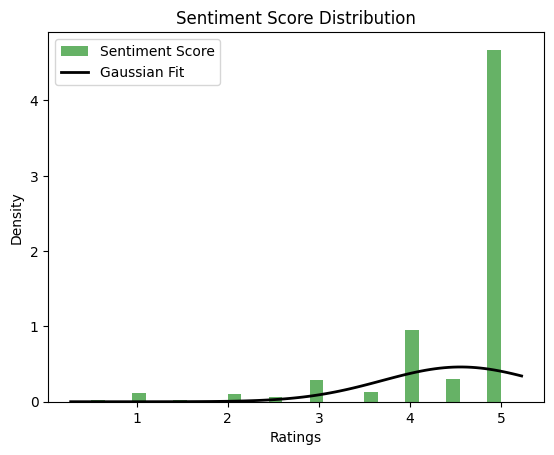

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

sentiment_scores = data['rating']

# Plot histogram
plt.hist(sentiment_scores, bins=30, density=True, alpha=0.6, color='g', label='Sentiment Score')

# Calculate mean and standard deviation
mu, std = norm.fit(sentiment_scores)

# Plot Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Sentiment Score Distribution')
plt.legend()
plt.show()

In [100]:
# Generating Sentiment Score

In [101]:
# Using Positive and Negative Word Count – With Normalization

In [102]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [103]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [104]:
def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize

In [105]:
preprocess_tag = [text_prep(i) for i in data['reviews']]
data["preprocess_txt_approach_1"] = preprocess_tag

In [106]:
data['total_len_approach_1'] = data['preprocess_txt_approach_1'].map(lambda x: len(x))

In [107]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

In [108]:
num_pos = data['preprocess_txt_approach_1'].map(lambda x: len([i for i in x if i in pos_words]))
data['pos_count'] = num_pos
num_neg = data['preprocess_txt_approach_1'].map(lambda x: len([i for i in x if i in neg_words]))
data['neg_count'] = num_neg

In [109]:
data['sentiment_approach_1'] = round((data['pos_count'] - data['neg_count']) / data['total_len_approach_1'], 2)

In [110]:
data.head()

,course_id,name,rating,reviews,Platform,institution,course_url,actual_sentiment,preprocess_txt_approach_1,total_len_approach_1,pos_count,neg_count,sentiment_approach_1
0,financial-markets-global,Financial Markets,3.0,"I really liked this class, practice lab assign...",Coursera,Not Available,Not Available,0.0,"[really, liked, class, practice, lab, assignme...",17,3,1,0.12
1,financial-markets-global,Financial Markets,3.0,Prof Steve Joordens is an excellent teacher an...,Coursera,Not Available,Not Available,0.0,"[prof, steve, joordens, excellent, teacher, dr...",18,4,0,0.22
2,financial-markets-global,Financial Markets,4.0,"In the beginning, I found the instructor ...",Coursera,Not Available,Not Available,1.0,"[beginning, found, instructor, little, difficu...",81,8,7,0.01
3,financial-markets-global,Financial Markets,4.0,It was an excelent and perfect course for...,Coursera,Not Available,Not Available,1.0,"[excelent, perfect, course, understanding, res...",17,3,0,0.18
4,financial-markets-global,Financial Markets,4.0,Murtaza Haider's readings were enjoyable ...,Coursera,Not Available,Not Available,1.0,"[murtaza, haider, reading, enjoyable, really, ...",19,1,1,0.00


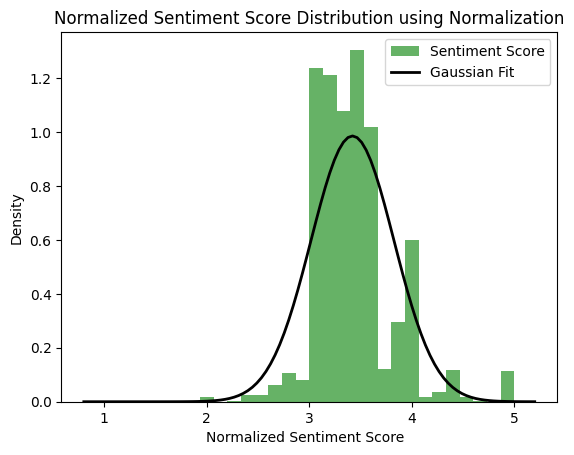

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


sentiment_scores = data['sentiment_approach_1']

# Filter out non-finite values
sentiment_scores = sentiment_scores[np.isfinite(sentiment_scores)]

# Normalize scores between 1 and 5
normalized_scores = 1 + (sentiment_scores - min(sentiment_scores)) * 4 / (max(sentiment_scores) - min(sentiment_scores))

# Plot histogram
plt.hist(normalized_scores, bins=30, density=True, alpha=0.6, color='g', label='Sentiment Score')

# Calculate mean and standard deviation
mu, std = norm.fit(normalized_scores)

# Plot Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Normalized Sentiment Score  ')
plt.ylabel('Density')
plt.title('Normalized Sentiment Score Distribution using Normalization')
plt.legend()
plt.show()


In [112]:
# Using Positive and Negative Word Counts – With Semi Normalization to calculate Sentiment Score

In [113]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Lemmatization, Tokenization, and Stop Words Removal

In [114]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [115]:
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize

In [116]:
preprocess_tag = [text_prep(i) for i in data['reviews']]
data["preprocess_txt_approach_2"] = preprocess_tag

In [117]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = data['preprocess_txt_approach_2'].map(lambda x: len([i for i in x if i in pos_words]))
data['pos_count'] = num_pos
num_neg = data['preprocess_txt_approach_2'].map(lambda x: len([i for i in x if i in neg_words]))
data['neg_count'] = num_neg

In [118]:
data['sentiment_approach_2'] = round(data['pos_count'] / (data['neg_count']+1), 2)
data['sentiment_approach_2'] = data['sentiment_approach_2'].map(lambda x: 5 if x > 5 else x)

In [119]:
data.head()

,course_id,name,rating,reviews,Platform,institution,course_url,actual_sentiment,preprocess_txt_approach_1,total_len_approach_1,pos_count,neg_count,sentiment_approach_1,preprocess_txt_approach_2,sentiment_approach_2
0,financial-markets-global,Financial Markets,3.0,"I really liked this class, practice lab assign...",Coursera,Not Available,Not Available,0.0,"[really, liked, class, practice, lab, assignme...",17,3,1,0.12,"[really, liked, class, practice, lab, assignme...",1.5
1,financial-markets-global,Financial Markets,3.0,Prof Steve Joordens is an excellent teacher an...,Coursera,Not Available,Not Available,0.0,"[prof, steve, joordens, excellent, teacher, dr...",18,4,0,0.22,"[prof, steve, joordens, excellent, teacher, dr...",4.0
2,financial-markets-global,Financial Markets,4.0,"In the beginning, I found the instructor ...",Coursera,Not Available,Not Available,1.0,"[beginning, found, instructor, little, difficu...",81,8,7,0.01,"[beginning, found, instructor, little, difficu...",1.0
3,financial-markets-global,Financial Markets,4.0,It was an excelent and perfect course for...,Coursera,Not Available,Not Available,1.0,"[excelent, perfect, course, understanding, res...",17,3,0,0.18,"[excelent, perfect, course, understanding, res...",3.0
4,financial-markets-global,Financial Markets,4.0,Murtaza Haider's readings were enjoyable ...,Coursera,Not Available,Not Available,1.0,"[murtaza, haider, reading, enjoyable, really, ...",19,1,1,0.00,"[murtaza, haider, reading, enjoyable, really, ...",0.5


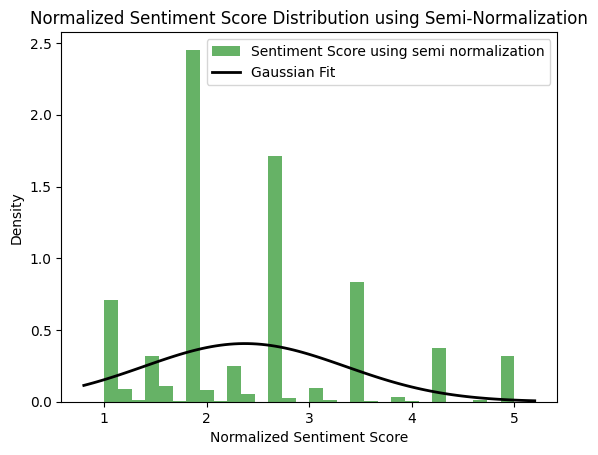

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df['sentiment_score'] is your sentiment score data
sentiment_scores = data['sentiment_approach_2']

# Normalize scores between 1 and 5
normalized_scores = 1 + (sentiment_scores - min(sentiment_scores)) * 4 / (max(sentiment_scores) - min(sentiment_scores))

# Plot histogram
plt.hist(normalized_scores, bins=30, density=True, alpha=0.6, color='g', label='Sentiment Score using semi normalization')

# Calculate mean and standard deviation
mu, std = norm.fit(normalized_scores)

# Plot Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Density')
plt.title('Normalized Sentiment Score Distribution using Semi-Normalization')
plt.legend()
plt.show()


# Using VADER SentimentIntensityAnalyser to calculate Sentiment Score 


In [121]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [122]:
sent = SentimentIntensityAnalyzer()

In [123]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in data['reviews']]
data['sentiment_score'] = polarity

In [124]:
data.head()

,course_id,name,rating,reviews,Platform,institution,course_url,actual_sentiment,preprocess_txt_approach_1,total_len_approach_1,pos_count,neg_count,sentiment_approach_1,preprocess_txt_approach_2,sentiment_approach_2,sentiment_score
0,financial-markets-global,Financial Markets,3.0,"I really liked this class, practice lab assign...",Coursera,Not Available,Not Available,0.0,"[really, liked, class, practice, lab, assignme...",17,3,1,0.12,"[really, liked, class, practice, lab, assignme...",1.5,0.84
1,financial-markets-global,Financial Markets,3.0,Prof Steve Joordens is an excellent teacher an...,Coursera,Not Available,Not Available,0.0,"[prof, steve, joordens, excellent, teacher, dr...",18,4,0,0.22,"[prof, steve, joordens, excellent, teacher, dr...",4.0,0.95
2,financial-markets-global,Financial Markets,4.0,"In the beginning, I found the instructor ...",Coursera,Not Available,Not Available,1.0,"[beginning, found, instructor, little, difficu...",81,8,7,0.01,"[beginning, found, instructor, little, difficu...",1.0,0.74
3,financial-markets-global,Financial Markets,4.0,It was an excelent and perfect course for...,Coursera,Not Available,Not Available,1.0,"[excelent, perfect, course, understanding, res...",17,3,0,0.18,"[excelent, perfect, course, understanding, res...",3.0,0.91
4,financial-markets-global,Financial Markets,4.0,Murtaza Haider's readings were enjoyable ...,Coursera,Not Available,Not Available,1.0,"[murtaza, haider, reading, enjoyable, really, ...",19,1,1,0.00,"[murtaza, haider, reading, enjoyable, really, ...",0.5,0.15


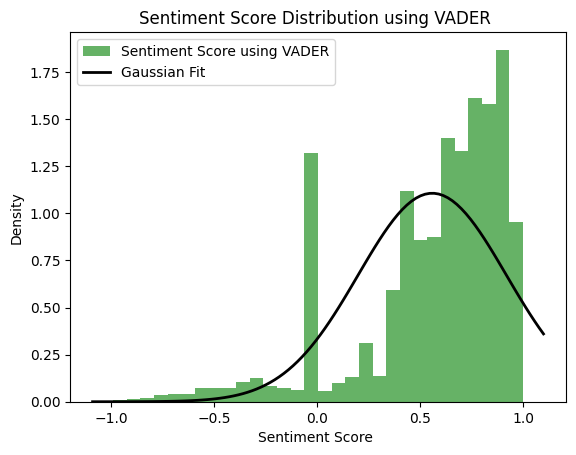

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


sentiment_scores = data['sentiment_score']

# Plot histogram
plt.hist(sentiment_scores, bins=30, density=True, alpha=0.6, color='g', label='Sentiment Score using VADER')

# Calculate mean and standard deviation
mu, std = norm.fit(sentiment_scores)

# Plot Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Sentiment Score ')
plt.ylabel('Density')
plt.title('Sentiment Score Distribution using VADER ')
plt.legend()
plt.show()


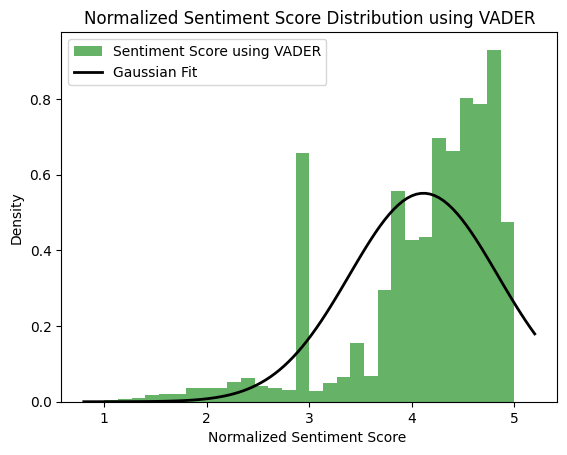

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


sentiment_scores = data['sentiment_score']

# Normalize scores between 1 and 5
normalized_scores = 1 + (sentiment_scores - min(sentiment_scores)) * 4 / (max(sentiment_scores) - min(sentiment_scores))

# Plot histogram
plt.hist(normalized_scores, bins=30, density=True, alpha=0.6, color='g', label='Sentiment Score using VADER')

# Calculate mean and standard deviation
mu, std = norm.fit(normalized_scores)

# Plot Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Normalized Sentiment Score ')
plt.ylabel('Density')
plt.title('Normalized Sentiment Score Distribution using VADER')
plt.legend()
plt.show()


In [127]:
data = data.drop(columns=[ 'preprocess_txt_approach_1', 'total_len_approach_1',
       'pos_count', 'neg_count', 'sentiment_approach_1',
       'preprocess_txt_approach_2', 'sentiment_approach_2'], axis=1)


In [128]:
data['sentiment_score'].describe()  

count    443342.000000
mean          0.559402
std           0.360392
min          -0.990000
25%           0.440000
50%           0.660000
75%           0.830000
max           1.000000
Name: sentiment_score, dtype: float64

In [129]:
data['sentiment_score'] = 1 + (data['sentiment_score'] - min(sentiment_scores)) * 4 / (max(sentiment_scores) - min(sentiment_scores))
data['sentiment_score'].describe()

count    443342.000000
mean          4.114377
std           0.724405
min           1.000000
25%           3.874372
50%           4.316583
75%           4.658291
max           5.000000
Name: sentiment_score, dtype: float64

In [130]:
data['Score'] = data['sentiment_score'] + data['rating']
data['Score'].describe()

count    443342.000000
mean          8.669950
std           1.177807
min           1.580402
25%           7.989950
50%           8.974874
75%           9.557789
max          10.000000
Name: Score, dtype: float64

In [131]:
data['course_id'].nunique(), data['reviews'].nunique()

(7989, 433588)

In [132]:
data.columns

Index(['course_id', 'name', 'rating', 'reviews', 'Platform', 'institution',
       'course_url', 'actual_sentiment', 'sentiment_score', 'Score'],
      dtype='object')

In [133]:
data['num_ratings'] = data.groupby('course_id')['rating'].transform('count')
data['num_reviews'] = data.groupby('course_id')['reviews'].transform(lambda x: x[x.str.len() > 0].count())

data.columns

Index(['course_id', 'name', 'rating', 'reviews', 'Platform', 'institution',
       'course_url', 'actual_sentiment', 'sentiment_score', 'Score',
       'num_ratings', 'num_reviews'],
      dtype='object')

In [134]:
course_data = data.groupby('course_id').agg({'name':'first','rating': 'mean', 'sentiment_score': 'mean', 'Score': 'mean', 'Platform': 'first', 'institution' : 'first', 'course_url' : 'first', 'num_ratings': 'first', 'num_reviews' : 'first'}).reset_index()

In [135]:
course_data.head()

,course_id,name,rating,sentiment_score,Score,Platform,institution,course_url,num_ratings,num_reviews
0,1000010,Learn Twitter Sentiment Analysis,4.581633,3.978977,8.560609,Coursera,Not Available,Not Available,49,49
1,1000234,Ruby on Rails 4---A Test-Driven Approach,4.275000,4.053266,8.328266,Coursera,Not Available,Not Available,20,20
2,1000448,Learn JavaScript for Web Development,4.285714,3.699210,7.984925,Coursera,Not Available,Not Available,7,7
3,1000550,Unity Networking From Scratch for (Unity 5 to ...,4.452381,4.050491,8.502872,Coursera,Not Available,Not Available,84,84
4,1000574,The Complete Developers Guide to MongoDB,4.390547,4.044376,8.434923,Coursera,Not Available,Not Available,402,402


In [136]:
course_data = course_data.rename(columns={'name': 'Course Name', 'rating': 'Average Rating', 'sentiment_score': 'Average Sentiment Score', 'Score': 'Average Score', 'Platform': 'Platform', 'institution': 'Institution', 'course_url': 'Course URL', 'num_ratings': 'Number of Ratings', 'num_reviews': 'Number of Reviews','Actual_sentiment':'actual_setiment'})

In [137]:
course_data.to_csv("course_data_final2.csv", index=False)

In [138]:
course_data.to_csv('elearn_recommendation_final2.csv')

In [139]:
import pandas as pd
course_data = pd.read_csv("course_data_final2.csv")
course_data = course_data.rename(columns={'course_id': 'Course ID', 'name': 'Course Name', 'rating': 'Average Rating', 'sentiment_score': 'Average Sentiment Score', 'Score': 'Average Score', 'Platform': 'Platform', 'institution': 'Institution', 'course_url': 'Course URL', 'num_ratings': 'Number of Ratings', 'num_reviews': 'Number of Reviews'})
course_data.to_csv("course_data_final2.csv", index=False)

In [140]:
import pandas as pd
import numpy as np

course_data = pd.read_csv("course_data_final.csv")
search_term = input("Search for a course: ")
length = input("Enter the number of courses to display: ")

if search_term != "":
    if len(length) == 0:
        print("Please enter a valid number")
    else:
        df_filtered = course_data[course_data["Course Name"].str.contains(search_term, case=False, na=False)]
        df_filtered = df_filtered.sort_values(by="Average Score", ascending=False)
        df_filtered = df_filtered[["Course Name",  "Platform" ,"Average Rating", "Average Sentiment Score", "Average Score","Number of Reviews"]]
        df_filtered = df_filtered[df_filtered["Number of Reviews"] > 10]
        df_filtered['Average Rating'] = df_filtered['Average Rating'].round(2)
        df_filtered['Average Sentiment Score'] = df_filtered['Average Sentiment Score'].round(2)
        df_filtered.index = range(1, len(df_filtered) + 1)
        df_filtered = df_filtered.head(int(length))
df_filtered.head(int(length))

,Course Name,Platform,Average Rating,Average Sentiment Score,Average Score,Number of Reviews
1,Introduction to Python Programming,Coursera,4.82,4.42,9.238922,11
2,Foundations of Data Science: K-Means Clusterin...,Coursera,4.60,4.56,9.160050,80
3,Using Databases with Python,Coursera,4.70,4.44,9.138505,2656
4,"Python 3: Deep Dive (Part 2 - Iteration, Gener...",Coursera,4.68,4.38,9.066012,11
5,Learn Python: The Complete Python Programming ...,Coursera,4.82,4.18,8.997716,11


In [141]:
import numpy as np

In [148]:
sentiment = np.zeros(len(df_filtered['Average Score']))
j=0
for i in df_filtered['Average Score']:
    if i >= 8.0:
        x = 1 #positive
    elif i >=1.0 and i < 5.0 :
        x = -1 #negative
    elif i >=7.0 and i < 8.0:
        x = 0 #neutral
    sentiment[j] = x
    j+=1
print(len(df_filtered['Average Score']))
print(len(sentiment))

5
5
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [149]:
df_filtered['predicted_sentiment'] = sentiment
df_filtered['actual_sentiment'] = data['actual_sentiment']
df_filtered.head()

,Course Name,Platform,Average Rating,Average Sentiment Score,Average Score,Number of Reviews,predicted_sentiment,actual_sentiment
1,Introduction to Python Programming,Coursera,4.82,4.42,9.238922,11,1.0,0.0
2,Foundations of Data Science: K-Means Clusterin...,Coursera,4.60,4.56,9.160050,80,1.0,1.0
3,Using Databases with Python,Coursera,4.70,4.44,9.138505,2656,1.0,1.0
4,"Python 3: Deep Dive (Part 2 - Iteration, Gener...",Coursera,4.68,4.38,9.066012,11,1.0,1.0
5,Learn Python: The Complete Python Programming ...,Coursera,4.82,4.18,8.997716,11,1.0,1.0


In [150]:
df_filtered.to_csv('test1_elearn_recommendation.csv')

In [151]:
data2=pd.read_csv('test1_elearn_recommendation.csv')
data2.head(5)

,Unnamed: 0,Course Name,Platform,Average Rating,Average Sentiment Score,Average Score,Number of Reviews,predicted_sentiment,actual_sentiment
0,1,Introduction to Python Programming,Coursera,4.82,4.42,9.238922,11,1.0,0.0
1,2,Foundations of Data Science: K-Means Clusterin...,Coursera,4.60,4.56,9.160050,80,1.0,1.0
2,3,Using Databases with Python,Coursera,4.70,4.44,9.138505,2656,1.0,1.0
3,4,"Python 3: Deep Dive (Part 2 - Iteration, Gener...",Coursera,4.68,4.38,9.066012,11,1.0,1.0
4,5,Learn Python: The Complete Python Programming ...,Coursera,4.82,4.18,8.997716,11,1.0,1.0


In [146]:
y_test_classes = data2['actual_sentiment']
y_pred_classes = data2['predicted_sentiment']

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
# Now you can compute evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 60.0
Precision: 60.0
Recall: 60.0
F1 Score: 60.0
Confusion Matrix:
[[0 1]
 [1 3]]
